# PROBLEM STATEMENT
You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Tshirt_Sizing_Dataset.csv')
data.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


# STEP#2: CREATE TESTING AND TRAINING DATASET

In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,2]

In [7]:
y

0     S
1     S
2     S
3     S
4     S
5     S
6     S
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: T Shirt Size, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [9]:
y=enc.fit_transform(y)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.25)

# STEP#3: MODEL TRAINING

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# STEP#4: MODEL TESTING

In [23]:
y_predict=model.predict(X_test)
y_predict

array([1, 0, 0, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

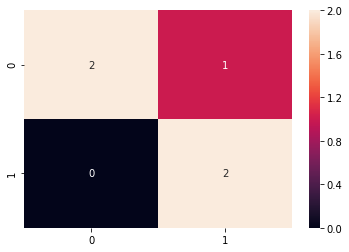

In [25]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [19]:
accuracy_score(y_test,y_predict)

0.5